# Jamboree Education

Jamboree plays significant role where thousands of students make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

In [1388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, Ridge

In [1389]:
dt = pd.read_csv('Jamboree_Admission.csv')
dt.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [1390]:
dt.shape

(500, 9)

In [1391]:
dt.size

4500

In [1392]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [1393]:
dt.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [1394]:
dt.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [1395]:
dt.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [1396]:
dt.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [1397]:
dt.rename(columns={'LOR ':'LOR'})

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [1398]:
dt.drop(columns = {'Serial No.'},inplace = True)
dt.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [1399]:
dt.duplicated().sum()

0

In [1400]:
dt.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

# Analysis of Univariate and Bivariate

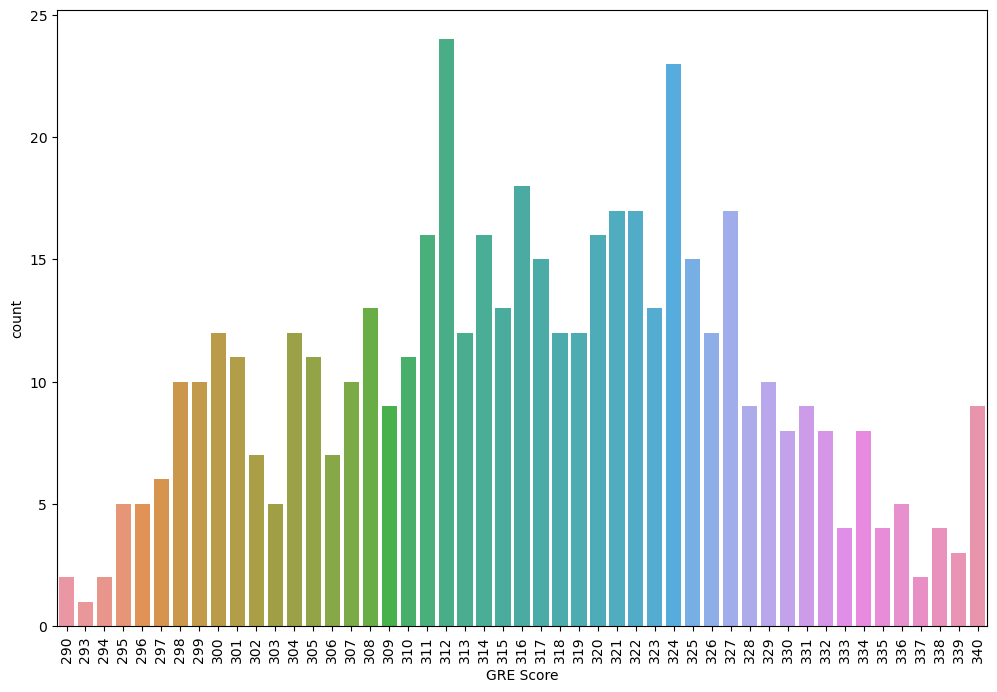

In [1401]:
plt.figure(figsize = (12,8))
sns.countplot(dt, x= dt['GRE Score'])
plt.xticks(rotation = 90)
plt.show()

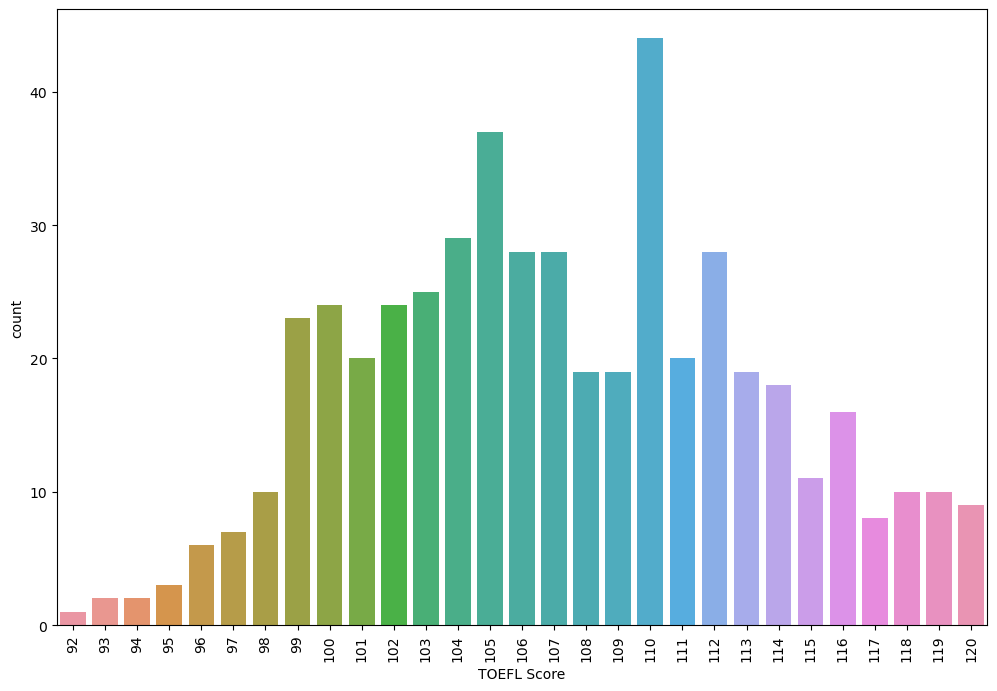

In [1402]:
plt.figure(figsize = (12,8))
sns.countplot(dt, x= dt['TOEFL Score'])
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='Chance of Admit '>

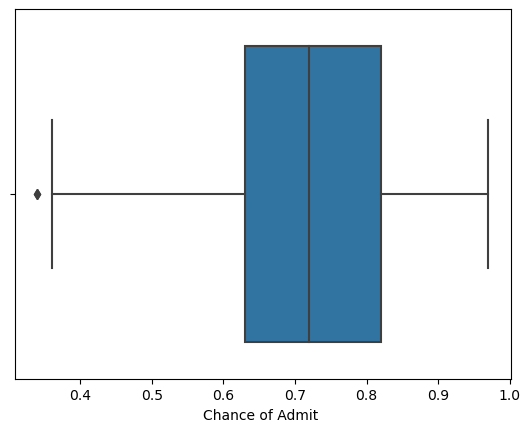

In [1403]:
sns.boxplot(dt, x = dt['Chance of Admit '])

<Axes: ylabel='Density'>

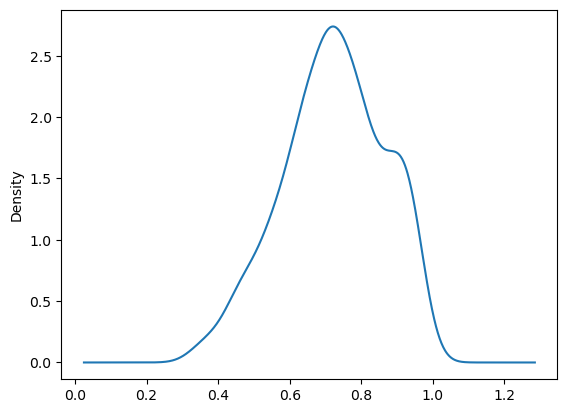

In [1404]:
dt['Chance of Admit '].plot.density()

<Axes: >

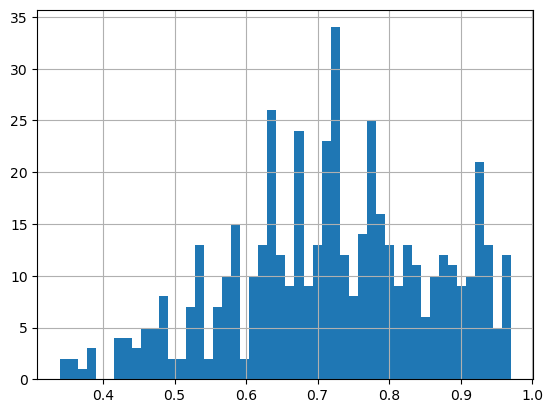

In [1405]:
dt['Chance of Admit '].hist(bins=50)

In [1406]:
dt.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

# University rating

In [1407]:
University_Rating = pd.DataFrame(dt['University Rating'].value_counts()).reset_index()
University_Rating

,index,University Rating
0,3,162
1,2,126
2,4,105
3,5,73
4,1,34


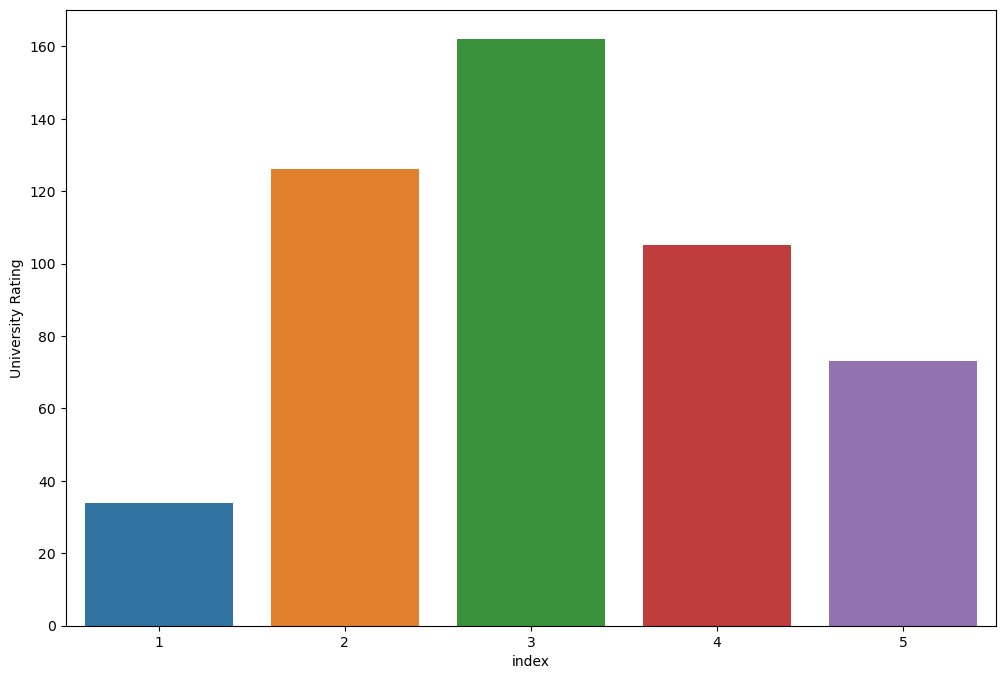

In [1408]:
plt.figure(figsize=(12,8))
sns.barplot(data = University_Rating, x = 'index', y = 'University Rating')
plt.show()

# GRE Score

In [1409]:
GRE_Score = pd.DataFrame(dt['GRE Score'].value_counts()).reset_index()
GRE_Score

,index,GRE Score
0,312,24
1,324,23
2,316,18
3,321,17
4,322,17
5,327,17
6,311,16
7,320,16
8,314,16
9,317,15


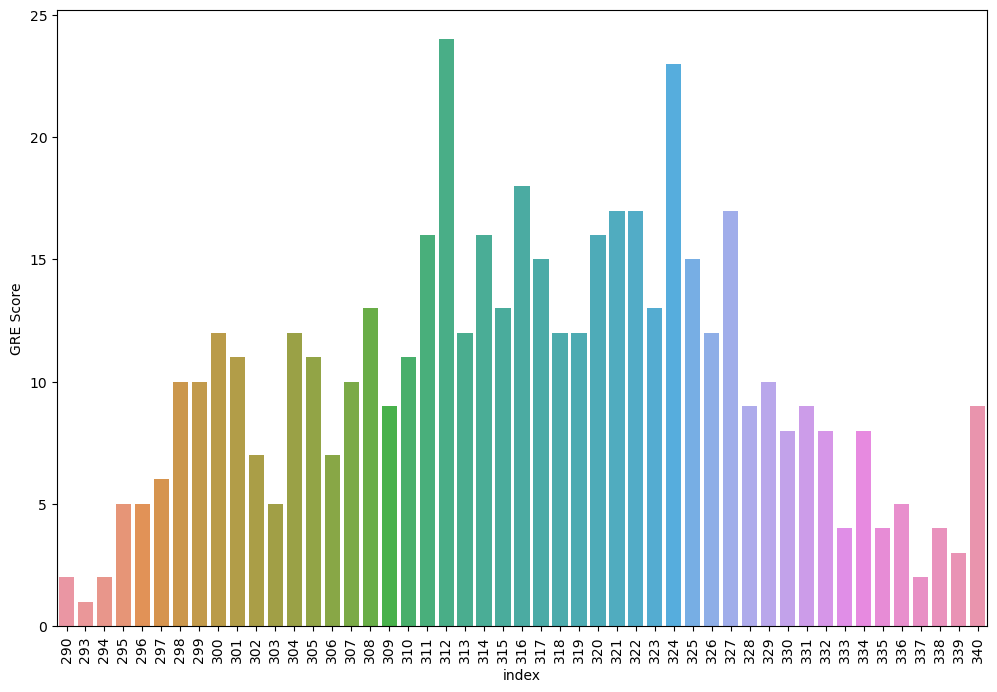

In [1410]:
plt.figure(figsize=(12,8))
sns.barplot(data = GRE_Score, x='index', y = 'GRE Score')
plt.xticks(rotation = 90)
plt.show()

# Research

In [1411]:
Research = pd.DataFrame(dt['Research'].value_counts()).reset_index()
Research

,index,Research
0,1,280
1,0,220


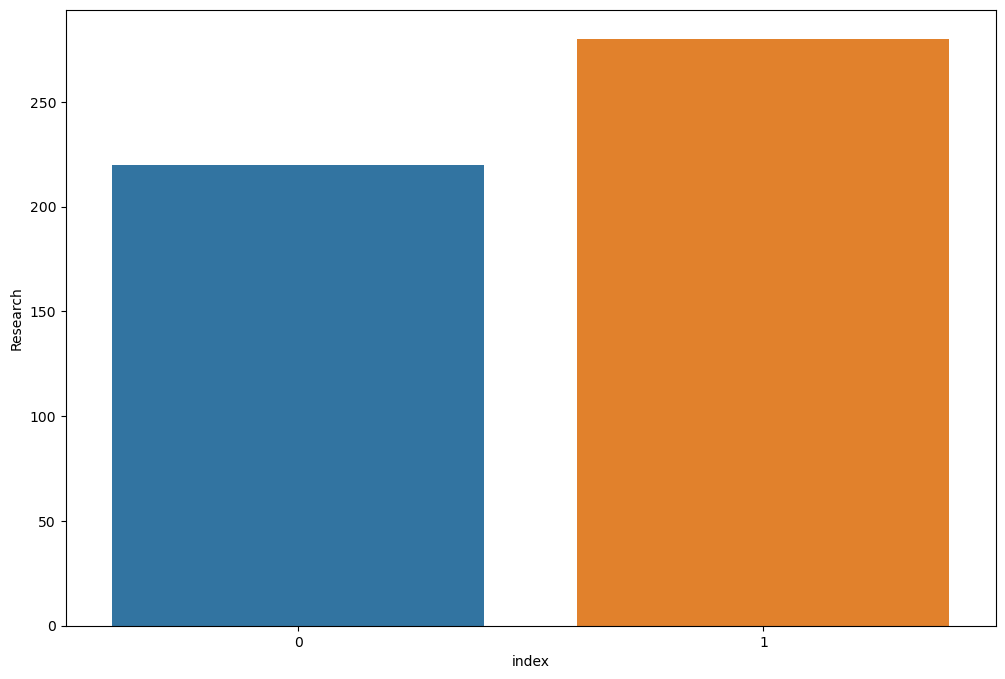

In [1412]:
plt.figure(figsize = (12,8))
sns.barplot(data = Research, x = 'index' , y='Research')
plt.show()

The above graph shows the corelation between reserach experiences and students, gshowing the frequency of observations within this relationship.

# SOP

In [1413]:
SOP = pd.DataFrame(dt['SOP'].value_counts()).reset_index()
SOP

,index,SOP
0,4.0,89
1,3.5,88
2,3.0,80
3,2.5,64
4,4.5,63
5,2.0,43
6,5.0,42
7,1.5,25
8,1.0,6


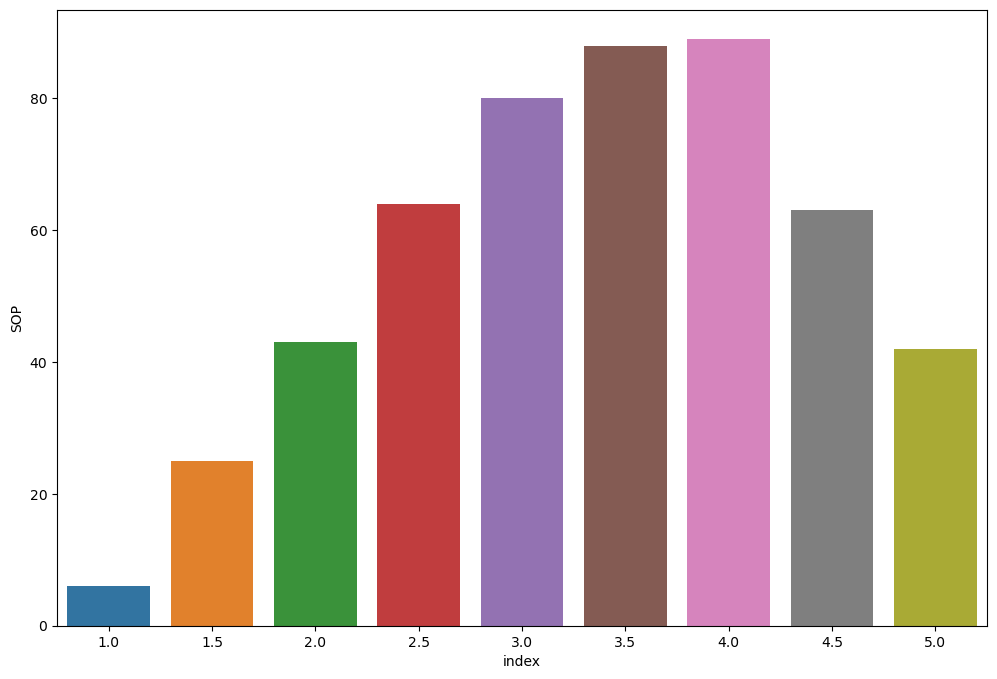

In [1414]:
plt.figure(figsize=(12,8))
sns.barplot(data = SOP, x = 'index', y = 'SOP')
plt.show()

# Bivariate Analysis

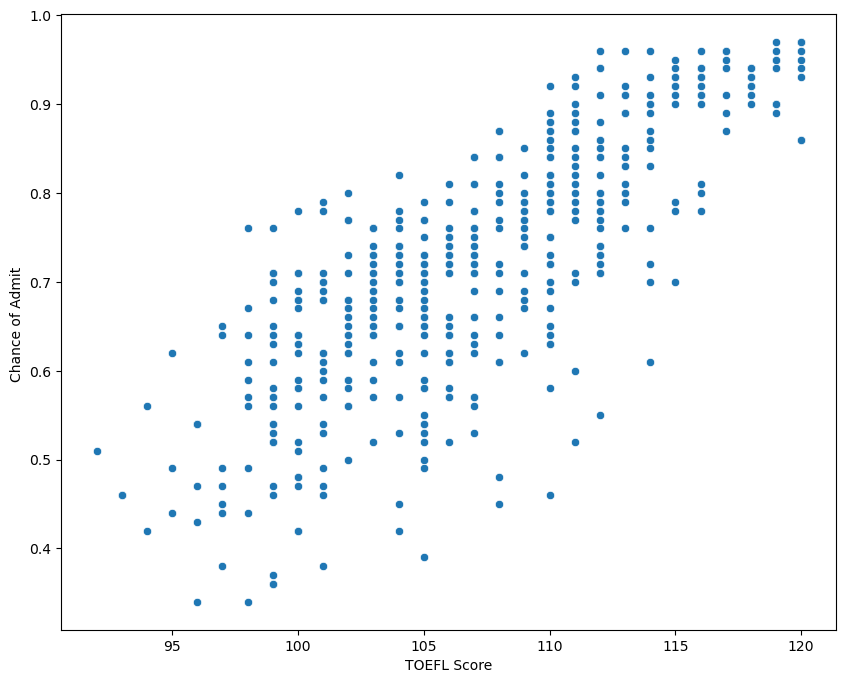

In [1415]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = dt, x='TOEFL Score', y = 'Chance of Admit ')
plt.show()

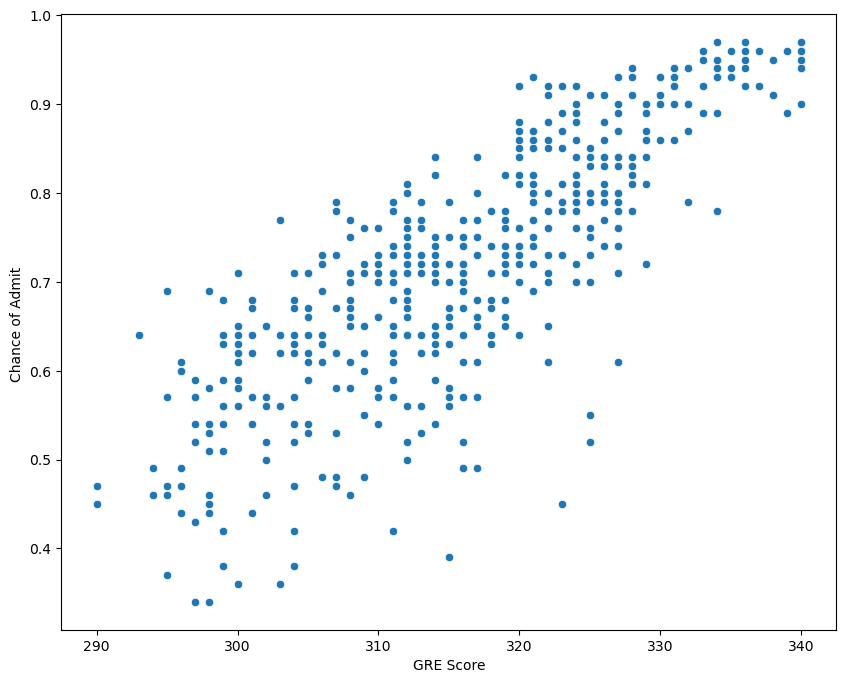

In [1416]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = dt, x='GRE Score', y = 'Chance of Admit ')
plt.show()

This scatter plot shows a nearly linear trend between the variables, indicating a positive coorelation with an upward trajectory

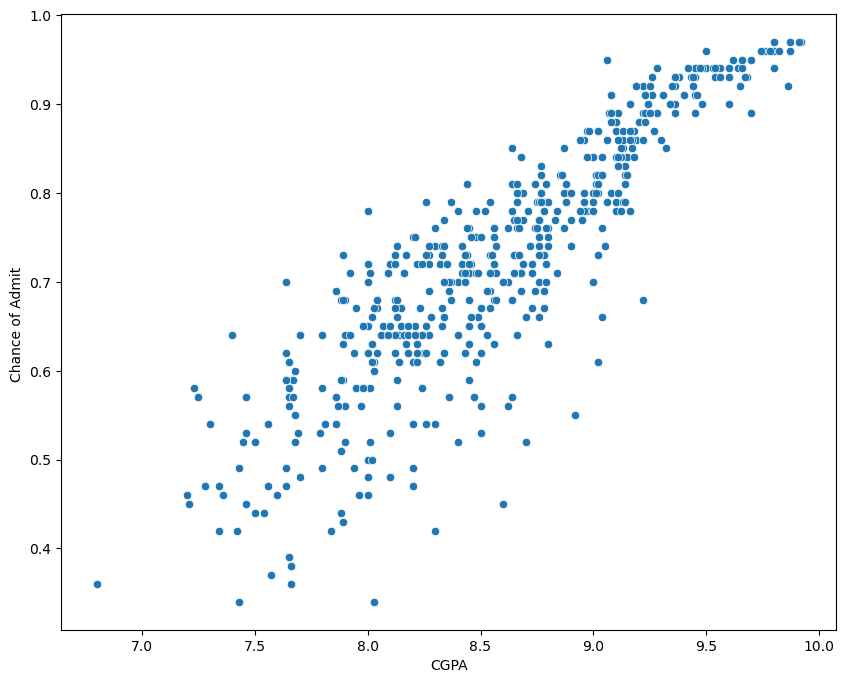

In [1417]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = dt, x='CGPA', y = 'Chance of Admit ')
plt.show()

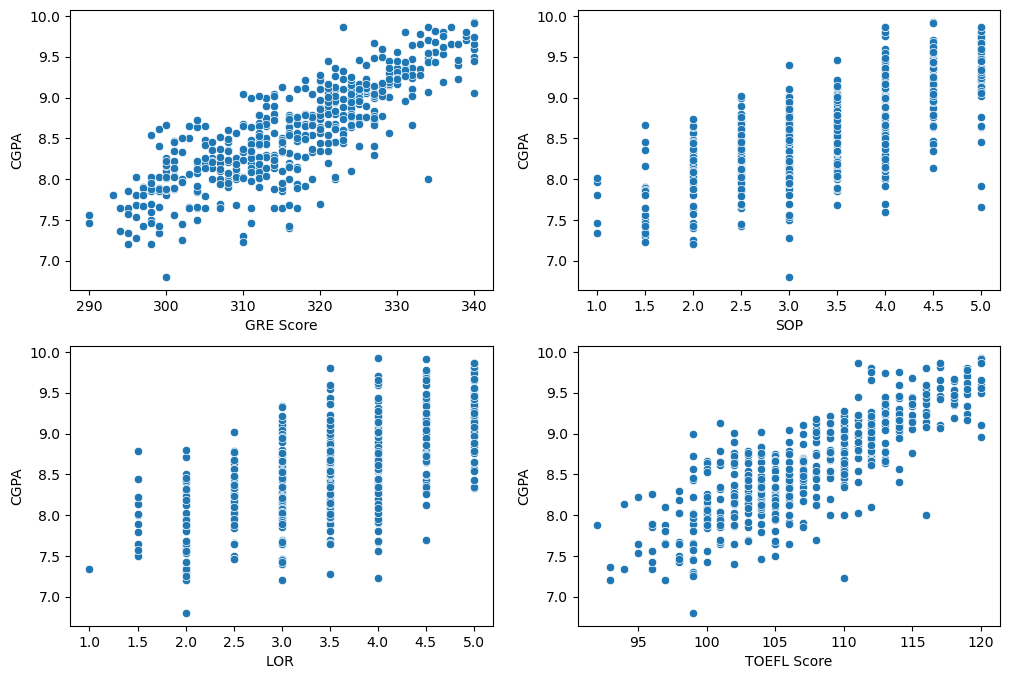

In [1418]:
plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
sns.scatterplot(data = dt, x = 'GRE Score' , y = 'CGPA')
plt.subplot(2,2,2)
sns.scatterplot(data = dt, x = 'SOP' , y = 'CGPA')
plt.subplot(2,2,3)
sns.scatterplot(data = dt, x = 'LOR ' , y = 'CGPA')
plt.subplot(2,2,4)
sns.scatterplot(data = dt, x = 'TOEFL Score' , y = 'CGPA')
plt.show()

In [1419]:
dt.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


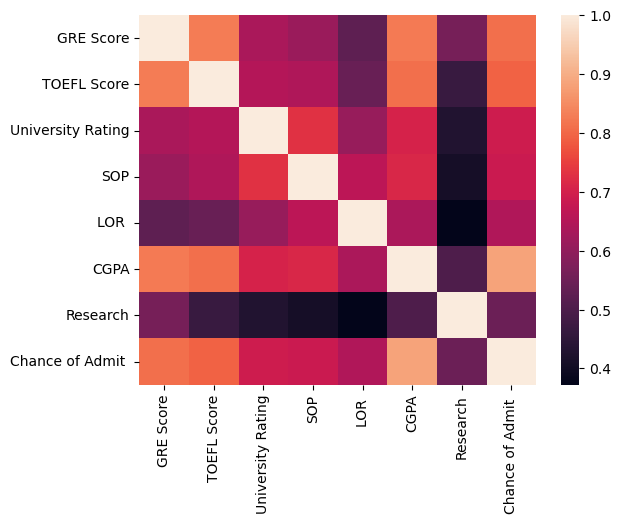

In [1420]:
sns.heatmap(dt.corr())
plt.show()

In [1421]:
cols = dt[['GRE Score','TOEFL Score', 'Chance of Admit ']]
cols


,GRE Score,TOEFL Score,Chance of Admit
0,337,118,0.92
1,324,107,0.76
2,316,104,0.72
3,322,110,0.80
4,314,103,0.65
...,...,...,...
495,332,108,0.87
496,337,117,0.96
497,330,120,0.93
498,312,103,0.73


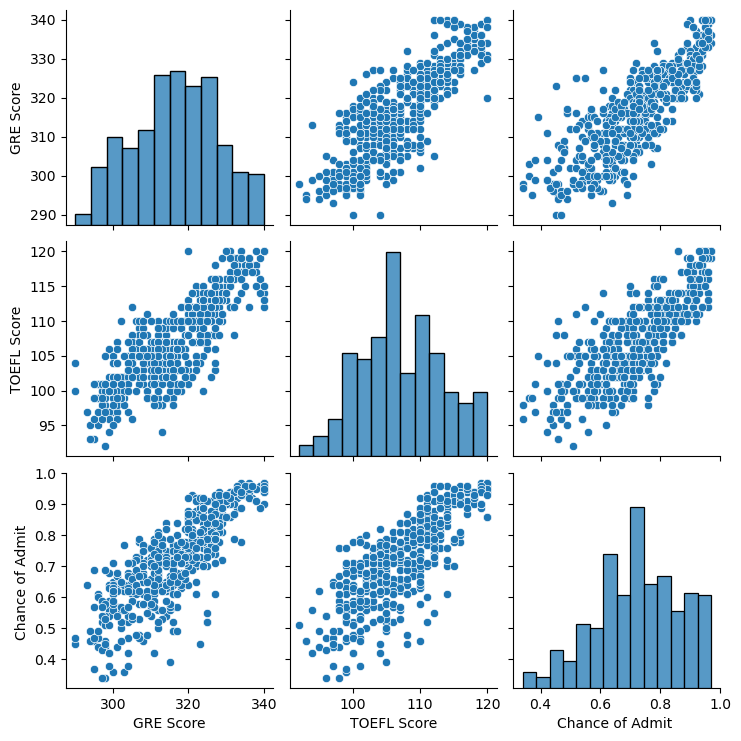

In [1422]:
sns.pairplot(cols)
plt.show()

# Checking for Outliers

Outliers for GRE Score

In [1423]:
q1 = np.quantile(dt['GRE Score'], 0.25)
q3 = np.quantile(dt['GRE Score'], 0.75)

print("25 percentile is ", q1,". 75 percentile is ",q3)
IQR = q3 - q1

upper_whisker = q3 + (1.5*IQR)
lower_whisker = q1 - (1.5*IQR)

print(dt[(dt['GRE Score'] > upper_whisker) | (dt['GRE Score'] < lower_whisker)])

25 percentile is  308.0 . 75 percentile is  325.0
Empty DataFrame
Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []


Outliers for SOP

In [1424]:
q1 = np.quantile(dt['SOP'], 0.25)
q3 = np.quantile(dt['SOP'], 0.75)

print("25 percentile is ", q1,". 75 percentile is ",q3)
IQR = q3 - q1

upper_whisker = q3 + (1.5*IQR)
lower_whisker = q1 - (1.5*IQR)

print(dt[(dt['SOP'] > upper_whisker) | dt['SOP'] < lower_whisker])

25 percentile is  2.5 . 75 percentile is  4.0
Empty DataFrame
Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []


Outliers for TOEFL Score

In [1425]:
q1 = np.quantile(dt['TOEFL Score'], 0.25)
q3 = np.quantile(dt['TOEFL Score'], 0.75)

print("25 percentile is ", q1,". 75 percentile is ",q3)
IQR = q3 - q1

upper_whisker = q3 + (1.5*IQR)
lower_whisker = q1 - (1.5*IQR)

(dt[(dt['TOEFL Score'] > upper_whisker) | dt['TOEFL Score'] < lower_whisker])

25 percentile is  103.0 . 75 percentile is  112.0


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


Outliers for LOR 

In [1426]:
q1 = np.quantile(dt['LOR '], 0.25)
q3 = np.quantile(dt['LOR '], 0.75)

print("25 percentile is ", q1,". 75 percentile is ",q3)
IQR = q3 - q1

upper_whisker = q3 + (1.5*IQR)
lower_whisker = q1 - (1.5*IQR)

print(dt[(dt['LOR '] > upper_whisker) | dt['LOR '] < lower_whisker])

25 percentile is  3.0 . 75 percentile is  4.0
     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
498        312          103                  4  4.0   5.0  8.43         0   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit   
0    

Outliers for CGPA

In [1427]:
q1 = np.quantile(dt['CGPA'], 0.25)
q3 = np.quantile(dt['CGPA'], 0.75)

print("25 percentile is ", q1,". 75 percentile is ",q3)
IQR = q3 - q1

upper_whisker = q3 + (0.5*IQR)
lower_whisker = q1 - (0.5*IQR)

print(dt[(dt['CGPA'] > upper_whisker) | (dt['CGPA'] < lower_whisker)])

25 percentile is  8.127500000000001 . 75 percentile is  9.04
     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
22         328          116                  5  5.0   5.0  9.50         1   
23         334          119                  5  5.0   4.5  9.70         1   
24         336          119                  5  4.0   3.5  9.80         1   
25         340          120                  5  4.5   4.5  9.60         1   
..         ...          ...                ...  ...   ...   ...       ...   
455        305          102                  2  1.5   2.5  7.64         0   
457        295           99                  1  2.0   1.5  7.57         0   
464        298           97                  2  2.0   3.0  7.21         0   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   

     Chance of

Outliers for Research

In [1428]:
q1 = np.quantile(dt['Research'], 0.25)
q3 = np.quantile(dt['Research'], 0.75)

print("25 percentile is ", q1,". 75 percentile is ",q3)
IQR = q3 - q1

upper_whisker = q3 + (0.5*IQR)
lower_whisker = q1 - (0.5*IQR)

print(dt[(dt['Research'] > upper_whisker) | dt['Research'] < lower_whisker])

25 percentile is  0.0 . 75 percentile is  1.0
Empty DataFrame
Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []


Outliers for Chance of Admit

In [1429]:
q1 = np.quantile(dt['Chance of Admit '], 0.25)
q3 = np.quantile(dt['Chance of Admit '], 0.75)

print("25 percentile is ", q1,". 75 percentile is ",q3)
IQR = q3 - q1

upper_whisker = q3 + (0.5*IQR)
lower_whisker = q1 - (0.5*IQR)

print(dt[(dt['Chance of Admit '] > upper_whisker) | dt['Chance of Admit '] < lower_whisker])

25 percentile is  0.63 . 75 percentile is  0.82
Empty DataFrame
Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []


# Data Preparation for Modelling

let us calculate taget variable for Linear Regression. Here ' Chance of Admit' serves as the dependent variable.

In [1430]:
dt.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [1431]:
y = dt['Chance of Admit ']
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [1432]:
x = dt.drop(columns = 'Chance of Admit ')
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [1433]:
x.shape , y.shape

((500, 7), (500,))

In [1434]:
x_train , x_test , y_train, y_test = train_test_split(x ,y, test_size = 0.2)

In [1435]:
x_train.shape

(400, 7)

In [1436]:
x_test.shape

(100, 7)

In [1437]:
y_train.shape

(400,)

In [1438]:
y_test.shape

(100,)

In [1439]:
scaling = MinMaxScaler()
scaling

MinMaxScaler()

In [1440]:
x_train = pd.DataFrame(scaling.fit_transform(x_train), columns = x_train.columns)
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.68,0.750000,0.75,0.875,0.875,0.785256,1.0
1,0.56,0.285714,0.25,0.375,0.625,0.557692,1.0
2,0.38,0.571429,0.50,0.375,0.500,0.423077,0.0
3,0.62,0.678571,0.50,0.375,0.500,0.673077,1.0
4,0.52,0.285714,0.25,0.125,0.500,0.435897,1.0
...,...,...,...,...,...,...,...
395,0.12,0.107143,0.25,0.500,0.250,0.237179,1.0
396,0.22,0.250000,0.50,0.375,0.250,0.528846,1.0
397,0.24,0.357143,0.50,0.625,1.000,0.490385,0.0
398,0.20,0.285714,0.50,0.250,0.500,0.596154,1.0


In [1441]:
x_test = pd.DataFrame(scaling.transform(x_test), columns = x_test.columns)
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.64,0.642857,0.50,0.625,0.500,0.692308,1.0
1,0.38,0.464286,1.00,0.625,0.625,0.564103,0.0
2,0.32,0.642857,0.25,0.625,0.750,0.528846,0.0
3,0.52,0.500000,0.25,0.375,0.750,0.487179,0.0
4,0.62,0.607143,0.50,0.625,0.625,0.641026,1.0
...,...,...,...,...,...,...,...
95,0.60,0.642857,1.00,0.750,0.750,0.791667,1.0
96,0.52,0.642857,0.50,0.625,0.750,0.564103,0.0
97,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
98,0.28,0.535714,0.50,0.625,0.500,0.339744,0.0


Preparing the Linear Regression Model

In [1442]:
model = LinearRegression()


In [1443]:
model.fit(x_train,y_train)
model

LinearRegression()

# Feature name with Coefficients

In [1444]:
pd.DataFrame({'Feature' : x_train.columns ,'Coefficients' : model.coef_})

,Feature,Coefficients
0,GRE Score,0.089281
1,TOEFL Score,0.085700
2,University Rating,0.020013
3,SOP,0.006033
4,LOR,0.070575
5,CGPA,0.370948
6,Research,0.022045


In [1445]:
model.intercept_

0.34650408453218423

# Traiin and Test Performance Checking

score of the model/Performance

In [1446]:
r2 = model.score(x_train,y_train)
r2

0.813134682707573

In [1447]:
r2 = model.score(x_test,y_test)
r2

0.8538497398665569

In [1448]:
y_test[:10]

275    0.78
132    0.71
226    0.63
184    0.72
305    0.74
30     0.65
111    0.69
99     0.79
121    0.94
331    0.73
Name: Chance of Admit , dtype: float64

In [1449]:
y_pred = model.predict(x_test)
y_pred[:10]

array([0.78665694, 0.69736656, 0.6880468 , 0.67669574, 0.77160951,
       0.59957795, 0.77192163, 0.80651112, 0.93543617, 0.62843957])

Performance with R2 score

In [1450]:
r2_score(y_test , y_pred)


0.8538497398665569

# Checking for MSE and RMSE

# MSE(Mean Square Error)

In [1451]:
np.square(y_train -  model.predict(x_train)).mean()

0.003804481507644584

# MAE (Mean Absolute Error)

In [1452]:
np.abs(y_train - model.predict(x_train)).mean()

0.04450487347021328

# RMSE(Root Mean Square Error)

In [1453]:
n = y_test.shape
n[0]

100

In [1454]:
np.sqrt(((np.sum(y_pred - y_test))**2)/n[0])

0.003443893159290745

# Actual y_test value and Y prediction Comparision

In [1455]:
test1 = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
test1

,Actual,Predicted
275,0.78,0.786657
132,0.71,0.697367
226,0.63,0.688047
184,0.72,0.676696
305,0.74,0.771610
...,...,...
470,0.87,0.848347
221,0.75,0.723985
0,0.92,0.952941
463,0.57,0.592506


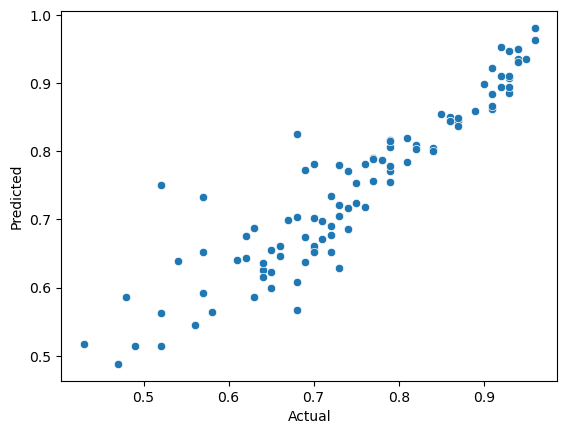

In [1456]:
sns.scatterplot(test1, x = 'Actual' , y = 'Predicted')
plt.show()

This shows the trend between actual and predicted value and this reveals a clear linear pattern.
Here the data points alogns themselves in linear trend

# Normality of Residuals

Checking for the error

In [1457]:
Error = test1['Actual'] - test1['Predicted']
Error[:10]

275   -0.006657
132    0.012633
226   -0.058047
184    0.043304
305   -0.031610
30     0.050422
111   -0.081922
99    -0.016511
121    0.004564
331    0.101560
dtype: float64

The mean of reesiduals is nearly zero

In [1458]:
Error.mean()

-0.0003443893159290745

We can see the difference between actual and predicted valuyes are almost zero which indiactes greaT favourable performances of residuals, contributing to the normality of data.

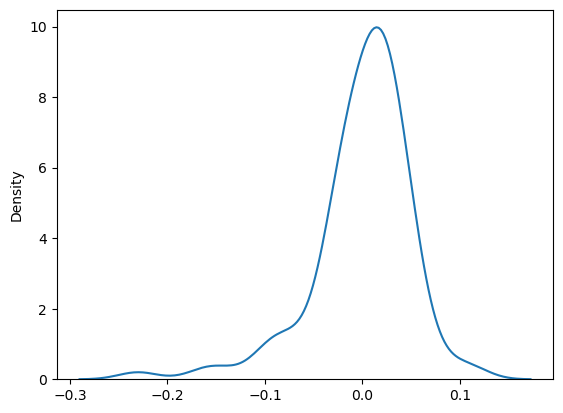

In [1459]:
sns.kdeplot(Error)
plt.show()

Distribution is somewhat skewed with mean close to zero. but the overall mean is centered around zero

# Checking the QQ plot, for the regression of fit of line

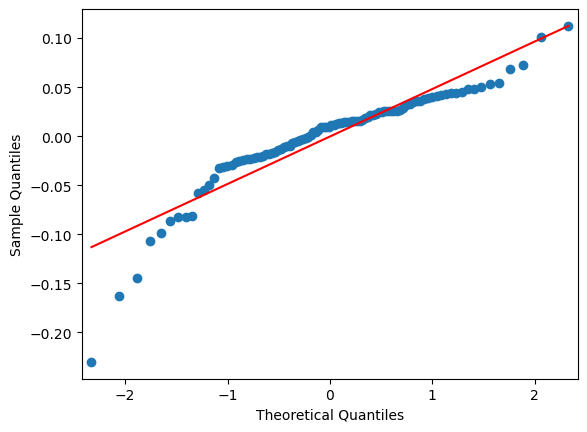

In [1460]:
sm.qqplot(Error , line = "r")
plt.show()

# QQ plot with actual and predicted line with best fit of regression

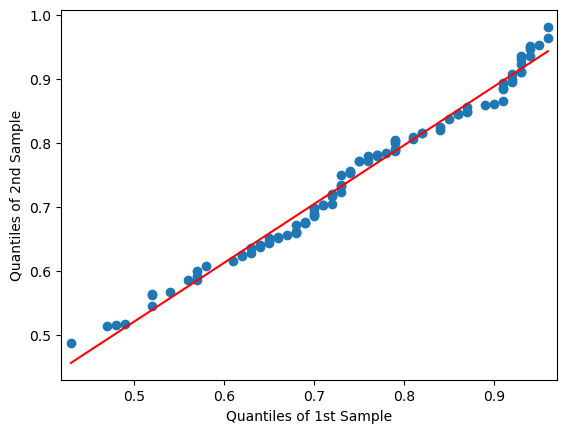

In [1461]:
sm.qqplot_2samples(y_test,y_pred, line = 'r')
plt.show()

# Check for Homoscedasticity

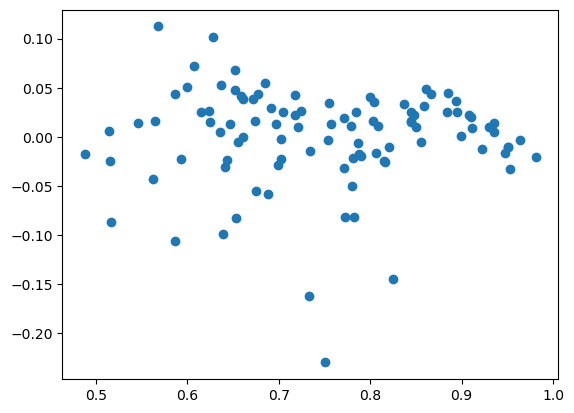

In [1462]:
plt.scatter( y_pred, Error)
plt.show()

The above graph shows dispersion between actual and predicted values indicating Homoscedasticity.

# Adjusted R2 Score

Formula : 1- (1-r2)*(n-1)/(n-d-1)
    r2 - score
    n - no of Rows
    d - no of features

In [1463]:
n , d = x_train.shape
print("Number of Rows:", n,"Features", d)
Numerator = (1-r2)*(n-1)
Denominator = (n-d-1)
1-(Numerator/Denominator)

Number of Rows: 400 Features 7


0.8512399137927453

# Multicollinearity check using VIF score

In [1464]:
x_multiCheck = pd.DataFrame(x_train , columns = x_train.columns)
vif = pd.DataFrame()
vif['Features'] = x_multiCheck.columns
vif['VIF'] = [variance_inflation_factor(x_multiCheck.values, i) for i in range(x_multiCheck.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,41.16
0,GRE Score,27.29
1,TOEFL Score,27.29
3,SOP,18.31
4,LOR,14.78
2,University Rating,10.32
6,Research,3.23


CGPA column has higher VIF score compared to rest, which indiactes significant level of multicollinearity. Hence this column is eliminated to enhance predictive and accuracy

In [1465]:
x_multiCheck.drop(columns = {'CGPA'}, inplace = True)

In [1466]:
x_multiCheck.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,Research
0,0.68,0.750000,0.75,0.875,0.875,1.0
1,0.56,0.285714,0.25,0.375,0.625,1.0
2,0.38,0.571429,0.50,0.375,0.500,0.0
3,0.62,0.678571,0.50,0.375,0.500,1.0
4,0.52,0.285714,0.25,0.125,0.500,1.0


In [1467]:
vif = pd.DataFrame()
vif['Features'] = x_multiCheck.columns
vif['VIF'] = [variance_inflation_factor(x_multiCheck.values, i) for i in range(x_multiCheck.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TOEFL Score,23.90
0,GRE Score,22.39
3,SOP,17.26
4,LOR,13.08
2,University Rating,10.30
5,Research,3.23


Noe GRE Score shows high VIF Score indicating significant level of multicollinearity. Hence this feature will be eliminated

In [1468]:
x_multiCheck.drop(columns ={"GRE Score"}, inplace = True)

In [1469]:
vif = pd.DataFrame()
vif['Features'] = x_multiCheck.columns
vif['VIF'] = [variance_inflation_factor(x_multiCheck.values, i) for i in range(x_multiCheck.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,SOP,17.16
3,LOR,12.97
0,TOEFL Score,12.76
1,University Rating,10.26
4,Research,2.87


Now SOP feature shows high VIF Score indicating significant level of multicollinearity. Hence this feature will be eliminated

In [1470]:
x_multiCheck.drop(columns ={"SOP"}, inplace = True)

In [1471]:
vif = pd.DataFrame()
vif['Features'] = x_multiCheck.columns
vif['VIF'] = [variance_inflation_factor(x_multiCheck.values, i) for i in range(x_multiCheck.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TOEFL Score,11.40
2,LOR,10.23
1,University Rating,8.59
3,Research,2.87


Now TOEFL Score feature shows high VIF Score indicating significant level of multicollinearity. Hence this feature will be eliminated

In [1472]:
x_multiCheck.drop(columns ={"TOEFL Score"}, inplace = True)

In [1473]:
vif = pd.DataFrame()
vif['Features'] = x_multiCheck.columns
vif['VIF'] = [variance_inflation_factor(x_multiCheck.values, i) for i in range(x_multiCheck.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,University Rating,7.11
1,LOR,7.03
2,Research,2.75


Now University Rating feature shows high VIF Score indicating significant level of multicollinearity. Hence this feature will be eliminated

In [1474]:
x_multiCheck.drop(columns ={"University Rating"}, inplace = True)

In [1475]:
vif = pd.DataFrame()
vif['Features'] = x_multiCheck.columns
vif['VIF'] = [variance_inflation_factor(x_multiCheck.values, i) for i in range(x_multiCheck.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,LOR,2.56
1,Research,2.56


# Checking Adjusted R2 for No Multicollinearity or less than 5 VIF Score

In [1476]:
n,d = x_multiCheck.shape
print("Number of Rows:",n,"Features:",d)
num = (1-r2)*(n-1)
den = n-d-1
1 - (num/den)

Number of Rows: 400 Features: 2


0.8531134665157587

Previously the performance indicated by Adjusted R-squared was 83.39. After removal of featues based on VIF, several features were dropped and there was slight increase in performance at 83.6 in Adjusted R2 score

# Analyze Stats summary for Regression Model using OLA

In [1477]:
x_sm = sm.add_constant(x_train)

In [1478]:
y_train1 = y_train.values
y_train1 - y_train1.reshape(-1,1)
y_train1.shape

(400,)

In [1479]:
model = sm.OLS(y_train1, x_sm)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     243.7
Date:                Sat, 17 Feb 2024   Prob (F-statistic):          1.64e-138
Time:                        16:40:47   Log-Likelihood:                 546.74
No. Observations:                 400   AIC:                            -1077.
Df Residuals:                     392   BIC:                            -1046.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3465      0.01

# Lets analyze with Polynomial features for better Performance

In [1480]:
dt.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [1481]:
x_train.shape

(400, 7)

In [1482]:
x_test.shape

(100, 7)

In [1483]:
poly = PolynomialFeatures(degree = 2, include_bias = False)
poly

PolynomialFeatures(include_bias=False)

In [1484]:
model =LinearRegression()
model

LinearRegression()

In [1485]:
x_train = poly.fit_transform(x_train)
x_train.shape


(400, 35)

In [1486]:
x_test = poly.transform(x_test)
x_test.shape

(100, 35)

In [1487]:
model.fit(x_train,y_train)

LinearRegression()

In [1488]:
ypoly_pred = model.predict(x_test)

In [1489]:
polypredicted = pd.DataFrame({"Actual ": y_test,
                             "Poly_predicted " : model.predict(x_test)})

polypredicted[:10]

,Actual,Poly_predicted
275,0.78,0.795872
132,0.71,0.686678
226,0.63,0.691483
184,0.72,0.692443
305,0.74,0.772946
30,0.65,0.577209
111,0.69,0.783747
99,0.79,0.804909
121,0.94,0.934136
331,0.73,0.616857


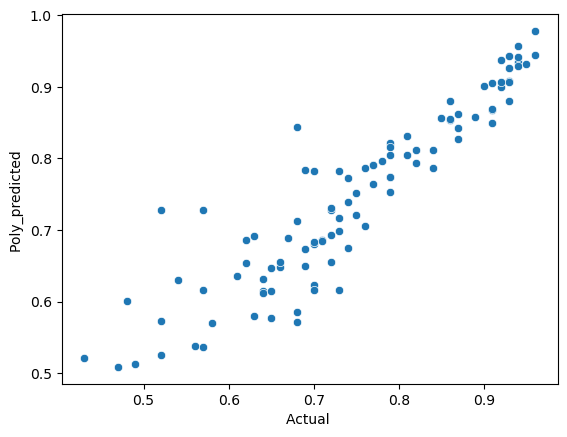

In [1490]:
sns.scatterplot(data = polypredicted, x ="Actual ", y="Poly_predicted ")
plt.show()

# Polynomial Prediction Performance

In [1491]:
model.score(x_test, y_test)

0.8429311507638635

Earlier Linear Regression score 78.7 was achieved.Upon incorporating Polynomial Regresion, a score of 79.4 was achieved. The difference between linear Regression and polynomial regression is negligible.

# R2 score for Polynomial Regression

In [1492]:
r2_score(y_test, ypoly_pred)

0.8429311507638635

# Adjusted R2 Score

In [1493]:
n,d = x_train.shape
print("Number of Rows:", n ,"Features:", d)
Num= (1-r2)*(n-1)
den = n-d-1
1-(num/den)

Number of Rows: 400 Features: 35


0.8397968302383412

The inclusion of polynomial features has resulted in decrease in Adjusted score. Wegot R2 score 78.3 which is now reduced to 76.6

# Residuals

In [1494]:
poly_error = y_test - ypoly_pred
poly_error[:10]

275   -0.015872
132    0.023322
226   -0.061483
184    0.027557
305   -0.032946
30     0.072791
111   -0.093747
99    -0.014909
121    0.005864
331    0.113143
Name: Chance of Admit , dtype: float64

# Checking for the mean of residuals

In [1495]:
np.mean(poly_error)

0.000612211934901879

# Normality of residuals

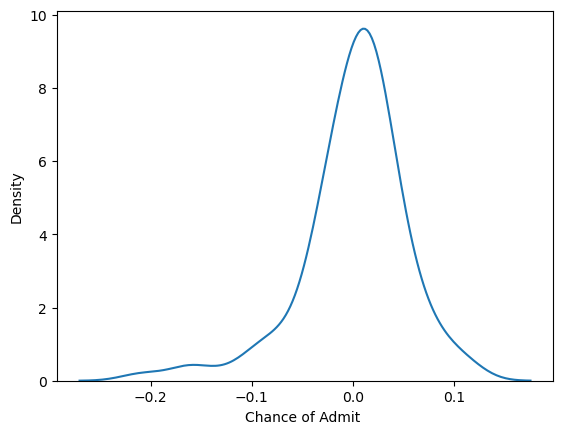

In [1496]:
sns.kdeplot(poly_error)
plt.show()

This is a left skewed distribution, resembling Normal distribution with mean centered around zero. This suggests there are some students having lower scores affecting their chance of admission

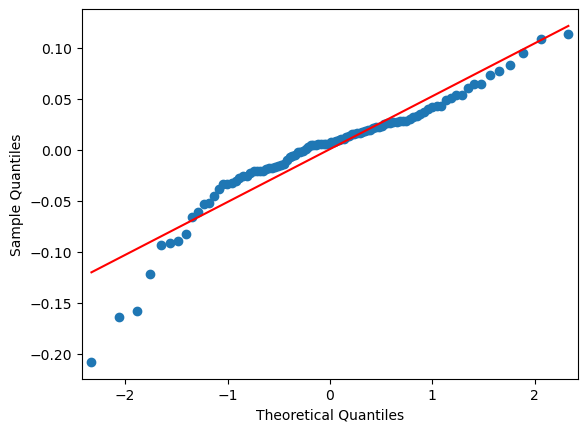

In [1497]:
sm.qqplot(poly_error, line = 's')
plt.show()

# Checking for Homoscedasticity

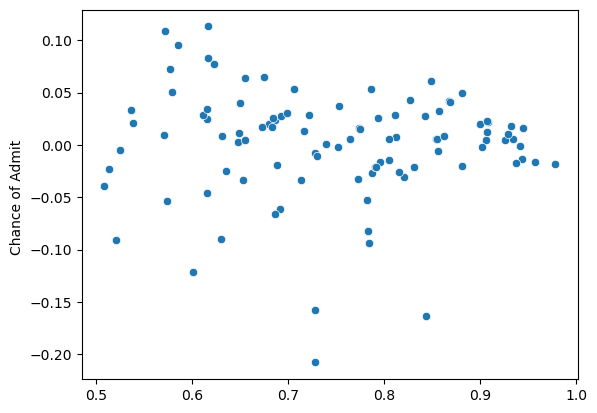

In [1498]:
sns.scatterplot(x=ypoly_pred , y=poly_error)
plt.show()

# MSE

In [1499]:
mean_squared_error(y_train, model.predict(x_train))

0.003419945397580363

# MAE

In [1500]:
mean_absolute_error(y_train ,  model.predict(x_train))

0.041626825862613875

# RMSE

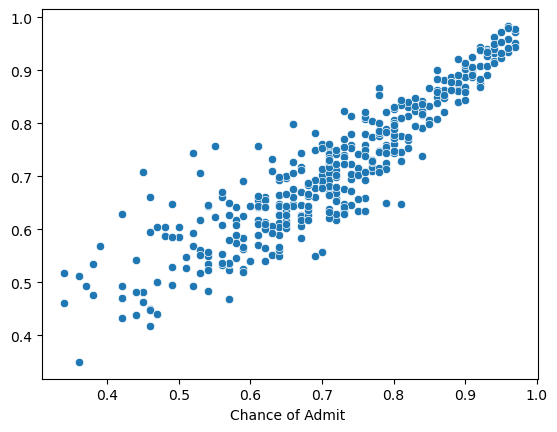

In [1501]:
sns.scatterplot(x=y_train , y=model.predict(x_train))
plt.show()

In [1502]:
n,d = x_test.shape
np.sqrt(((np.sum(model.predict(x_test)-y_test))**2)/n)

0.00612211934901879

In [1503]:
x_sm = sm.add_constant(x_train)
y_plytrain = y_train.values
y_polytrain = y_train1.reshape(-1,1)
y_polytrain.shape

(400, 1)

In [1504]:
model = sm.OLS(y_polytrain, x_sm)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     53.17
Date:                Sat, 17 Feb 2024   Prob (F-statistic):          3.25e-120
Time:                        16:40:48   Log-Likelihood:                 568.05
No. Observations:                 400   AIC:                            -1066.
Df Residuals:                     365   BIC:                            -926.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3250      0.027     11.944      0.0

# Checking for the Regularisation as per both Lasso and Ridge Regression

# Lasso Regression

### 1.Performs L1 regularization, i.e adds penalty equivalent to the absolute value of the magnitude of coefficients
### 2.Minimization objective = LS Obj + alpha * (sum of absolute value of coefficients)

In [1505]:
x_train.shape , x_test.shape

((400, 35), (100, 35))

In [1506]:
y_train.shape ,y_test.shape

((400,), (100,))

In [1507]:
Lassomodel = Lasso(alpha = 1)
Lassomodel

Lasso(alpha=1)

In [1508]:
Lassomodel.fit(x_train, y_train)

Lasso(alpha=1)

In [1509]:
Lassomodel.coef_[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [1510]:
Lassomodel.intercept_

0.715125

In [1511]:
y_test[:10]

275    0.78
132    0.71
226    0.63
184    0.72
305    0.74
30     0.65
111    0.69
99     0.79
121    0.94
331    0.73
Name: Chance of Admit , dtype: float64

In [1512]:
Lassomodel.predict(x_test)[:10]

array([0.715125, 0.715125, 0.715125, 0.715125, 0.715125, 0.715125,
       0.715125, 0.715125, 0.715125, 0.715125])

In [1513]:
Lassomodel.score(x_test, y_test)

-0.0640086002611937

In [1514]:
Lassomodel.score(x_train , y_train)

0.0

In [1515]:
LassoModelprediction = pd.DataFrame({
    "Actual" : y_test,
    "Lasso_predicted" : Lassomodel.predict(x_test)
})

LassoModelprediction[:10]

,Actual,Lasso_predicted
275,0.78,0.715125
132,0.71,0.715125
226,0.63,0.715125
184,0.72,0.715125
305,0.74,0.715125
30,0.65,0.715125
111,0.69,0.715125
99,0.79,0.715125
121,0.94,0.715125
331,0.73,0.715125


# Residuals

In [1516]:
LassoError = y_test - Lassomodel.predict(x_test)
LassoError

275    0.064875
132   -0.005125
226   -0.085125
184    0.004875
305    0.024875
         ...   
470    0.154875
221    0.034875
0      0.204875
463   -0.145125
329   -0.285125
Name: Chance of Admit , Length: 100, dtype: float64

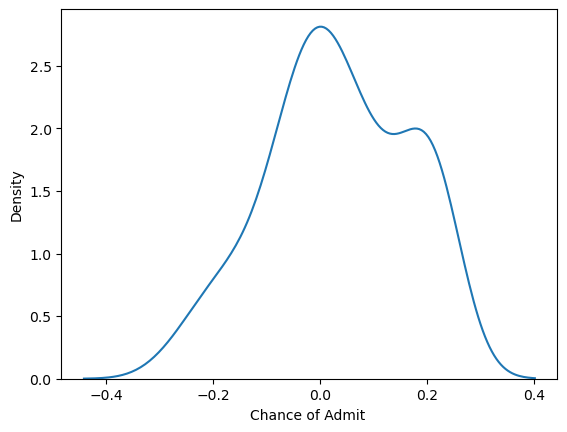

In [1517]:
sns.kdeplot(LassoError)
plt.show()

From the KDE plot we can say, the normality of residuals deteriotes when using Lasso Regression Model. This indicates an increase in error and instability in the predictions, leading to less reliable outcomes.

# Ridge Regression

1. Performs L2 regularization
Adds penalty equivalent to the sqaure of the magnitude of coefficients.
2. Minimization objective = LS Obj + alpha*(su of square of coefficients)



In [1518]:
RidgeModel = Ridge(alpha=10)
RidgeModel

Ridge(alpha=10)

In [1519]:
RidgeModel.fit(x_train, y_train)

Ridge(alpha=10)

In [1520]:
RidgeModel.predict(x_test).round(3)[:10]

array([0.765, 0.681, 0.675, 0.663, 0.757, 0.603, 0.773, 0.801, 0.953,
       0.633])

In [1521]:
RidgeModelPrediction = pd.DataFrame({
    "Actual" : y_test,
    "Ridge_predicted" : RidgeModel.predict(x_test)
})

RidgeModelPrediction[:10]

,Actual,Ridge_predicted
275,0.78,0.765373
132,0.71,0.681277
226,0.63,0.675129
184,0.72,0.663222
305,0.74,0.756828
30,0.65,0.603189
111,0.69,0.772500
99,0.79,0.801137
121,0.94,0.952639
331,0.73,0.633204


In [1522]:
RidgeModel.score(x_train , y_train)

0.790957280128402

In [1523]:
RidgeModel.score(x_test, y_test)

0.841058970869387

# Residuals

In [1524]:
RidgeError = y_test - RidgeModel.predict(x_test)
RidgeError

275    0.014627
132    0.028723
226   -0.045129
184    0.056778
305   -0.016828
         ...   
470    0.036505
221    0.039813
0     -0.043184
463   -0.043371
329   -0.110660
Name: Chance of Admit , Length: 100, dtype: float64

# Normality of Residuals

<Axes: xlabel='Chance of Admit ', ylabel='Density'>

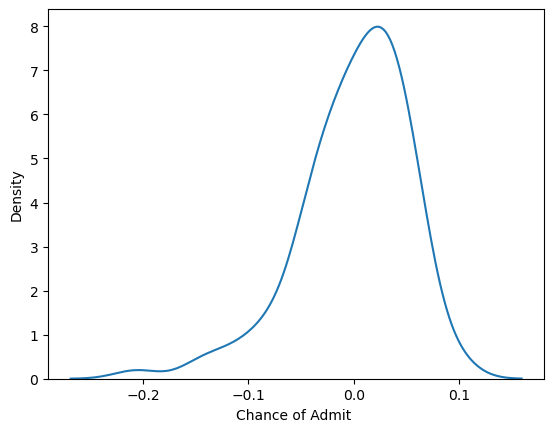

In [1525]:
sns.kdeplot(RidgeError)

From above analysis its evident that scores obtained for both training and test datasets are slightly lower compared to those achieved using the Linear regression algorithm. KDE plot indicates a slight shift towards the right, suggesting that the mean does not precisely align with zero. This observation implies that error has a discernible impact, particularly in the context of Ridge regression.

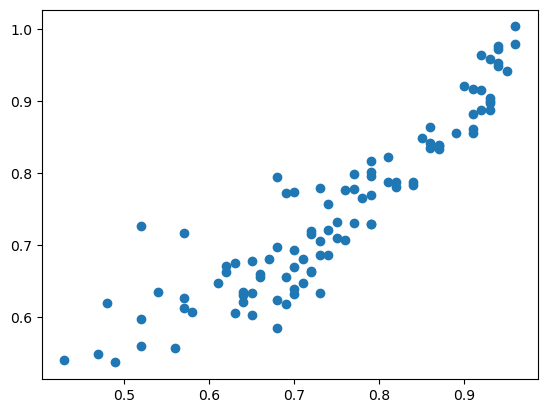

In [1526]:
plt.scatter(x = y_test, y = RidgeModel.predict(x_test))
plt.show()

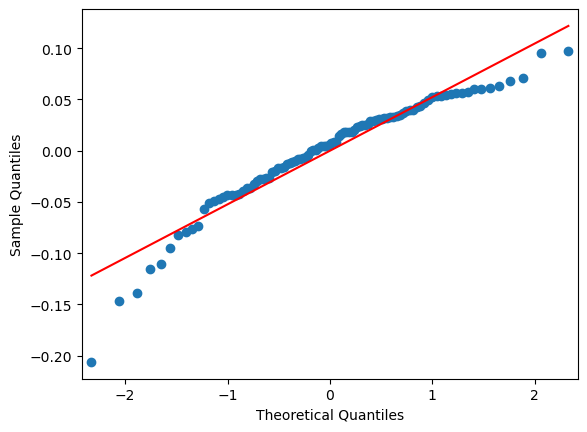

In [1527]:
sm.qqplot(RidgeError, line = "r")
plt.show()

we exploered regularization methods such as Lasso and Ridge to potentially enhance the model's predictive accuracy. Despite our efforts, these approaches did not yield much satisfactory results in improving performance. Thus, next step is to go with cross validation method to further enhance model's performance.

# Cross Validation

## Cross Validation to check performance

In [1528]:
dt1 = dt
dt1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [1529]:
dt1.shape

(500, 8)

In [1530]:
x.shape , y.shape

((500, 7), (500,))

In [1531]:
x_train_cv , x_test , y_train_cv , y_test = train_test_split(x,y,test_size = 0.2)
x_train , x_val , y_train , y_val = train_test_split(x_train_cv , y_train_cv, test_size = 0.2)

In [1532]:
print(x_train.shape , y_train.shape)
print(x_val.shape , y_val.shape)
print(x_test.shape , y_test.shape)

(320, 7) (320,)
(80, 7) (80,)
(100, 7) (100,)


In [1533]:
ScalingCV = StandardScaler()
ScalingCV

StandardScaler()

In [1534]:
Xtraincv = ScalingCV.fit_transform(x_train)
Xvalcv = ScalingCV.fit_transform(x_val)
xtestcv = ScalingCV.transform(x_test)

In [1535]:
Modelcv = LinearRegression()
Modelcv

LinearRegression()

In [1536]:
Modelcv.fit(Xtraincv , y_train)

LinearRegression()

In [1537]:
Modelcv.coef_

array([0.01133999, 0.01892261, 0.00941541, 0.00490624, 0.01807812,
       0.06744476, 0.01520318])

In [1538]:
Modelcv.score(Xtraincv , y_train)

0.8282812324115261

In [1539]:
y_predcv = Modelcv.predict(Xvalcv)
y_predcv[:10]

array([0.76723111, 0.86502494, 0.73944216, 0.47599619, 0.7932149 ,
       0.69457135, 0.86790549, 0.56655579, 0.69789627, 0.69124148])

In [1540]:
y_val[:10]

299    0.71
99     0.79
226    0.63
79     0.46
263    0.70
465    0.54
140    0.84
205    0.57
54     0.70
181    0.71
Name: Chance of Admit , dtype: float64

In [1541]:
pd.DataFrame({
    "Actual" : y_val,
    "predicted" : y_predcv

})[:10]

,Actual,predicted
299,0.71,0.767231
99,0.79,0.865025
226,0.63,0.739442
79,0.46,0.475996
263,0.70,0.793215
465,0.54,0.694571
140,0.84,0.867905
205,0.57,0.566556
54,0.70,0.697896
181,0.71,0.691241


In [1542]:
Modelcv.score(Xvalcv, y_val)

0.569518118128246

In [1543]:
Modelcv.score(xtestcv , y_test)

0.6667103779108859

Using cross validation method,we partitioned the dataset into traing, testing and validation subsets to enhance predictive accuracy.
We say our model achieved 84.3% performance on validation data. However upon evaluating the model on testing data, the performance slightly declined to 75% indicating slight deviation from the linear regression fit. Ridge regression yielded the most favorable performance of 80% beacuse of which we can say it is a preferred method for optimizing the dataset's performance in Jamboree Project.

# Insights

1. CGPA, GRE Score, TOEFL Score are the priority features for predicting admission chances with CGPA the most significant
2. In-Depth data exploration of the CGPA column to identify universities where students have a high chances of admission. Followed by FRE score and TOEFL score.
3. University Rating does not significantly impact admission chances. Therefore focus on other influential factors rather than solely relying on one university rankings.


# Recommendations

1. While analysis we determined that 'serial no' does not contribute to the predictive power of model, leading us to eliminate it from consideration.
2. We performed thorough outlier treatment, which did not significantly impact the dataset, ensuring data integrity.
3. Standardizing the features resulted in a more uniformly distributed dataset, thereby enhancing the predictive capabilities of our model. These methodical steps underscore the robustness of our approach and demonstrate tyransparency in our methodology.
4. We observed that both GRE Scores and Toefl scores contribute significantly in prediction the chance of admission. Conversely, University rating and Research ccontribute less. Therefore, when considering feature selection for modeling. prioritizing GREScore and TOEFL score would likely yield more accuracy.
5. We employed Linear Reg algorithm for regression Analysis, which yielded best fit model. Analysis also incluided Lasso and ridge to enhance interpretability and optimize feature selection. However linear regreession line emerged as the most suitable fir for our dataset.
 